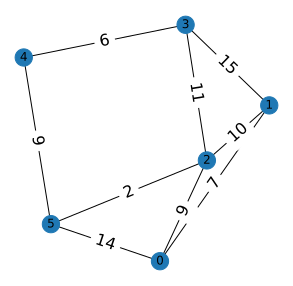

[0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
display.set_matplotlib_formats('svg')

import numpy as np
import sys
import functools
import operator

# create weighted graph
G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

# plot the graph
plt.figure(figsize = (5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size = 16, edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data = True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

# prepare arrays for estimate and certainty
dist_estimate = [sys.maxsize] * nx.number_of_nodes(G) 
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[0] = 0

print(dist_estimate)
print(dist_certainty)

#
# please fill in this part (Dijkstra's algorithm)
#
      
print(dist_estimate)
print(dist_certainty)


# Quiz 9-(1) & (2)

In [37]:
# prepare arrays for estimate and certainty
dist_estimate = [sys.maxsize] * nx.number_of_nodes(G) 
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[0] = 0

print(dist_estimate)
print(dist_certainty)

def Dijkstra(G, start_node, dist_estimate, dist_certainty):
    selected = start_node
    while 0 in dist_certainty:
#     for i in range(5):
        print(dist_estimate)
        print(dist_certainty)
    #     dist_estimate[start_node] = 0
        dist_certainty[selected] = 1
        neighbors = G.neighbors(selected)
        for i in neighbors:
            if dist_certainty[i] == 0:
#                 print(selected, G.get_edge_data(selected, i)['weight'], dist_estimate[selected])
                dist_estimate[i] = min(G.get_edge_data(selected, i)['weight'] + dist_estimate[selected], dist_estimate[i])
        min_dist = sys.maxsize
        for idx, dist in enumerate(dist_estimate):
#             print(dist < min_dist & dist_certainty[idx] == 0)
            if (dist < min_dist) & (dist_certainty[idx] == 0):
                min_dist = dist
                selected = idx
      
Dijkstra(G, 0, dist_estimate, dist_certainty)

print(dist_estimate)
print(dist_certainty)

[0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[0, 7, 9, 9223372036854775807, 9223372036854775807, 14]
[1, 0, 0, 0, 0, 0]
[0, 7, 9, 22, 9223372036854775807, 14]
[1, 1, 0, 0, 0, 0]
[0, 7, 9, 20, 9223372036854775807, 11]
[1, 1, 1, 0, 0, 0]
[0, 7, 9, 20, 20, 11]
[1, 1, 1, 0, 0, 1]
[0, 7, 9, 20, 20, 11]
[1, 1, 1, 1, 0, 1]
[0, 7, 9, 20, 20, 11]
[1, 1, 1, 1, 1, 1]


# Quiz 9-(3)

In [39]:
# prepare arrays for estimate and certainty
dist_estimate = [sys.maxsize] * nx.number_of_nodes(G) 
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[1] = 0

print(dist_estimate)
print(dist_certainty)

Dijkstra(G, 1, dist_estimate, dist_certainty)

print(dist_estimate)
print(dist_certainty)

[9223372036854775807, 0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[9223372036854775807, 0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[7, 0, 10, 15, 9223372036854775807, 9223372036854775807]
[0, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 9223372036854775807, 21]
[1, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 9223372036854775807, 12]
[1, 1, 1, 0, 0, 0]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 0, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 1, 1]


# Quiz 9-(4)

I think it's better to make a toy example to explain the reason why Dijkstra's algorithm is not suitable for networks with negative weight edges.

In [44]:
# create weighted graph
G = nx.Graph()
G.add_nodes_from(range(0, 2))
G.add_weighted_edges_from([(0, 1, 5), (0, 2, 3), (1, 2, -7)])


In [45]:
# prepare arrays for estimate and certainty
dist_estimate = [sys.maxsize] * nx.number_of_nodes(G) 
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[0] = 0

print(dist_estimate)
print(dist_certainty)

Dijkstra(G, 0, dist_estimate, dist_certainty)

print(dist_estimate)
print(dist_certainty)

[0, 9223372036854775807, 9223372036854775807]
[0, 0, 0]
[0, 9223372036854775807, 9223372036854775807]
[0, 0, 0]
[0, 5, 3]
[1, 0, 0]
[0, -4, 3]
[1, 0, 1]
[0, -4, 3]
[1, 1, 1]


Through the process of Dijkstra's algorithm, starting from vertex 0, we can see that it first selected vertex 2 as certain vertex, and then use it to update distance between 0 and 1 and end the process.

But it's obvious that the shortest distance between vertex 0 and 2 is the path: 0-1-2, whose weight is -2.

So at that time Dijkstra's algorithm didn't work for networks with negative weight edges.